# Programming Assignment 4: Image Classification using Bag_of_Features

## MDS201803


## Setup

In [1]:
# Set up parameters, image paths and category list
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from PA4_utils import *
import Bag_of_Features_code as bfc


# This is the list of categories / directories to use. The categories are
# somewhat sorted by similarity so that the confusion matrix looks more
# structured (indoor and then urban and then rural).
categories = ['airplanes', 'helicopter','car_side', 'Motorbikes','grand_piano',  
              'sunflower','umbrella','butterfly'];
# This list of shortened category names is used later for visualization
abbr_categories = ['Apl', 'Hel', 'Car', 'Mbk', 'Pno', 'Sfl', 'Umb', 'Bfy'];

# Number of training examples per category to use. Max is 100. 
num_train_per_cat = 100

# This function returns lists containing the file path for each train
# and test image, as well as lists with the label of each train and
# test image. By default all four of these lists will have 800 elements
# where each element is a string.
data_path = osp.join('..', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                 num_train_per_cat);

## Bag of SIFT features with Nearest Neighbor classifier

### Represent each image with the Bag of SIFT feature

To create a new vocabulary, make sure `vocab_filename` is different than the old vocabulary, or delete the old one.

In [2]:
print('Using the BAG-OF-SIFT representation for images')

vocab_filename = 'vocab_dict.pickle'
if not osp.isfile(vocab_filename):
    # Construct the vocabulary
    print('No existing visual word vocabulary found. Computing one from training images')
    vocab_size = 200  # Larger values will work better (to a point) but be slower to compute
    vocab = bfc.build_vocabulary(train_image_paths, vocab_size)
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)
        print('{:s} saved'.format(vocab_filename))

train_image_feats = bfc.get_bags_of_sifts(train_image_paths, vocab_filename)
test_image_feats = bfc.get_bags_of_sifts(test_image_paths, vocab_filename)

Using the BAG-OF-SIFT representation for images


### Classify each test image by training and using the Nearest Neighbor classifier

In [3]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = bfc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats, K = 5)

Using NEAREST NEIGHBOR classifier to predict test set categories
KNN neighbourhood size chosen :  5


In [4]:
predicted_categories

['helicopter',
 'airplanes',
 'Motorbikes',
 'umbrella',
 'grand_piano',
 'airplanes',
 'airplanes',
 'Motorbikes',
 'airplanes',
 'grand_piano',
 'car_side',
 'helicopter',
 'airplanes',
 'umbrella',
 'helicopter',
 'helicopter',
 'helicopter',
 'sunflower',
 'helicopter',
 'helicopter',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'Motorbikes',
 'Motorbikes',
 'grand_piano',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'grand_piano',
 'sunflower',
 'grand_piano',
 'grand_piano',
 'helicopter',
 'grand_piano',
 'sunflower',
 'grand_piano',
 'butterfly',
 'grand_piano',
 'sunflower',
 'umbrella',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'butterfly',
 'butterfly',
 'grand_piano',
 'sunflower',
 'umbrella',
 'umbrella',
 'sunflower',
 'umbrella',
 'umbrella',
 'sunflower',
 'umbrella',
 'butterfly',
 'grand_piano',
 'grand_pian

###  Build a confusion matrix and score the recognition system

The accuracy of the classifier is :  0.6375


<IPython.core.display.Javascript object>


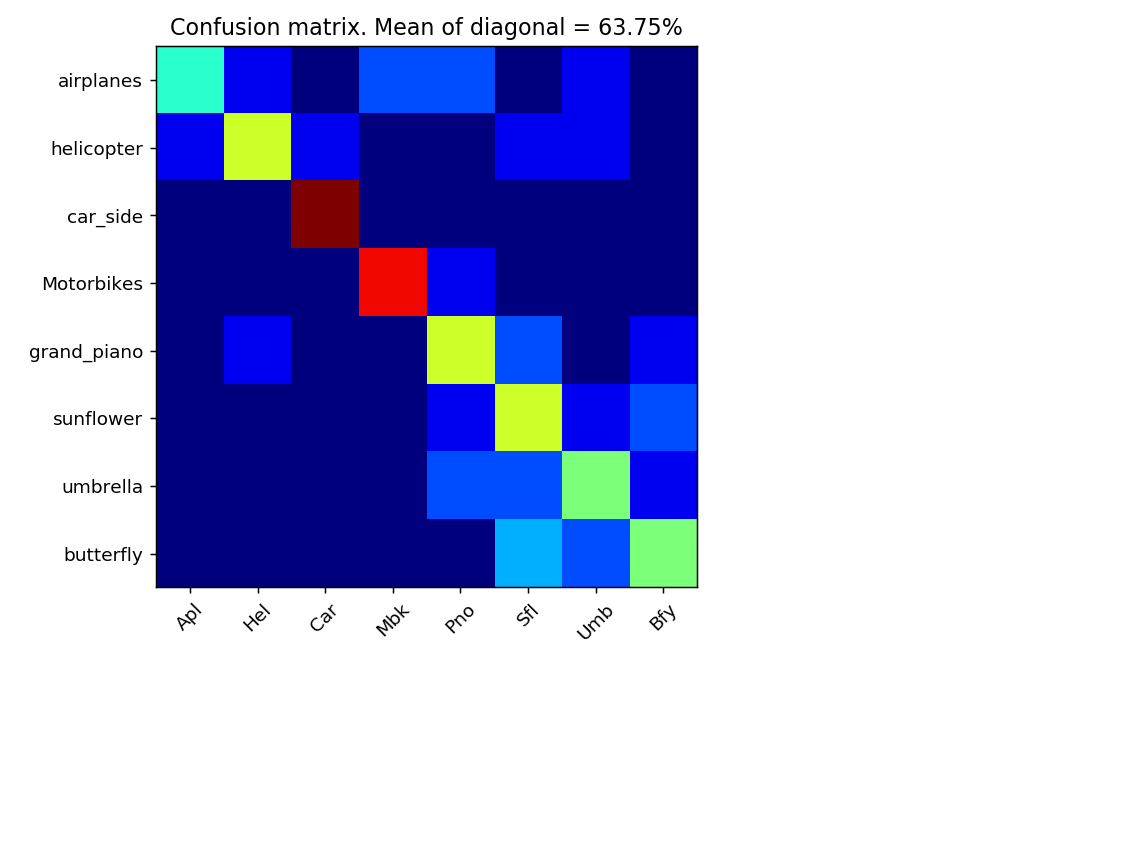

In [5]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)

## Bag of SIFT features and SVM classifier
We will reuse the bag of SIFT features from before.

The difference is that this time we will classify them with a support vector machine (SVM).

### Classify each test image by training and using the SVM classifiers

In [6]:
print('Using SVM classifier to predict test set categories')
predicted_categories = bfc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories


In [7]:
predicted_categories

['airplanes',
 'airplanes',
 'Motorbikes',
 'helicopter',
 'airplanes',
 'airplanes',
 'airplanes',
 'Motorbikes',
 'airplanes',
 'Motorbikes',
 'car_side',
 'helicopter',
 'helicopter',
 'umbrella',
 'helicopter',
 'helicopter',
 'helicopter',
 'helicopter',
 'helicopter',
 'helicopter',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'car_side',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'Motorbikes',
 'grand_piano',
 'umbrella',
 'grand_piano',
 'grand_piano',
 'helicopter',
 'grand_piano',
 'grand_piano',
 'grand_piano',
 'grand_piano',
 'grand_piano',
 'sunflower',
 'helicopter',
 'sunflower',
 'sunflower',
 'sunflower',
 'sunflower',
 'butterfly',
 'sunflower',
 'umbrella',
 'sunflower',
 'umbrella',
 'umbrella',
 'butterfly',
 'umbrella',
 'umbrella',
 'sunflower',
 'umbrella',
 'helicopter',
 'grand_piano',
 'grand_pi

### Build a confusion matrix and score the recognition system

The accuracy of the classifier is :  0.725


<IPython.core.display.Javascript object>


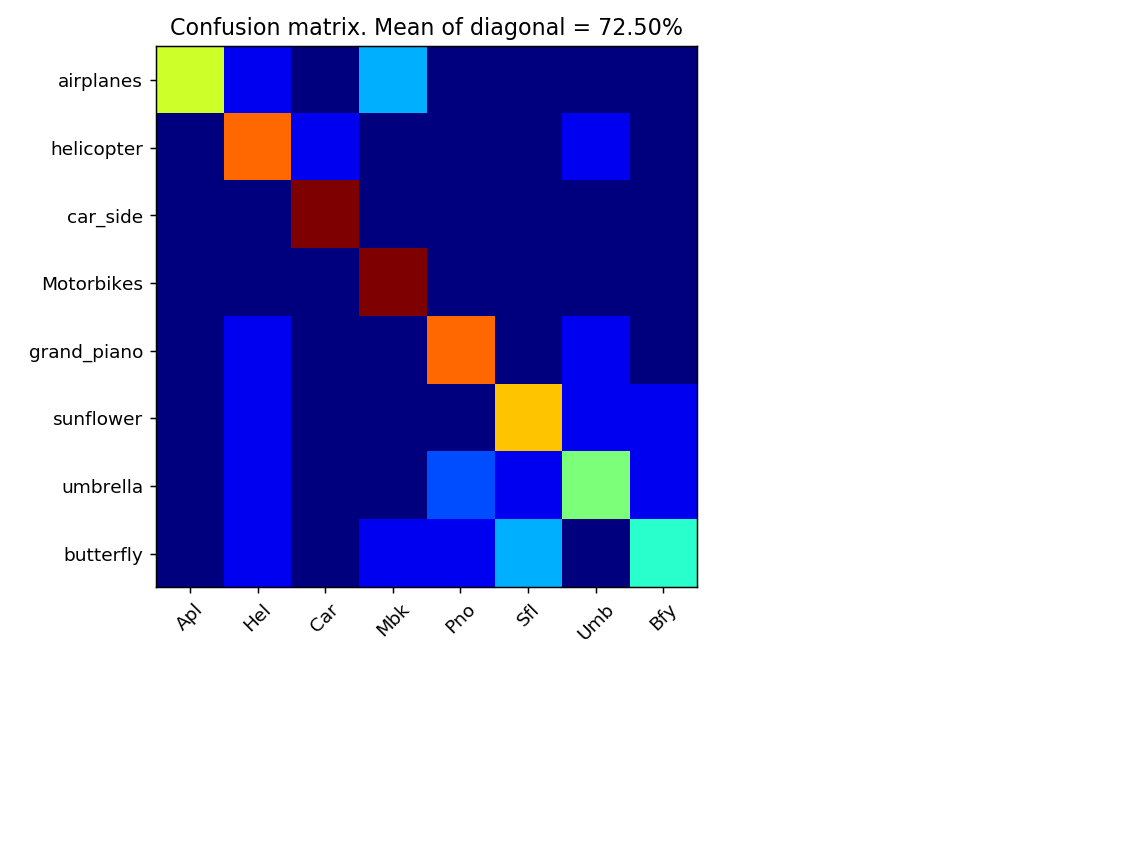

In [8]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories)